In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math, time 

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [ ]:
data = pd.read_csv("mnistsub.csv", header = None)
print(data)

            0         1  2
0    1.366376  1.268686  9
1   -3.665525  2.794929  3
2   -5.108688  1.757409  5
3   -4.207911  1.837971  3
4   -0.741759 -1.260283  1
..        ...       ... ..
791 -3.611363  2.280933  3
792 -5.064690 -4.016920  5
793 -2.402431  0.940965  9
794 -1.905723 -1.455366  1
795  1.410947 -2.328816  9

[796 rows x 3 columns]


In [ ]:
data = data.sample(frac=1).reset_index(drop=True)
data.columns = ['x','y','label']
data.head()

,x,y,label
0,-2.321985,-1.706037,1
1,-6.974842,-4.230779,5
2,-2.168523,1.563148,9
3,-6.875887,-3.804622,5
4,-1.905723,-1.455366,1


In [ ]:
x = data.drop('label', axis=1)
y = data['label']

1. Tune the necessary hyperparameters by for instance grid search. In this exercise we are concerned with
the hyperparameters given in Table 1. Every hyperparameter should be tested for at least 3 values
but you are free to add more testings

Trying with Hyper parameter tuning for individual Kernels

In [ ]:
def hyperParameter_tuning(model, hyperParameters):

    clf = GridSearchCV(model, hyperParameters, cv=3)
    clf.fit(x,y)
    y_pred = clf.predict(x)
    print('Best Hyperparameters found:\n', clf.best_params_)    
    print("Train accuracy : ", accuracy_score(y,y_pred))

    return clf


### 1) Kernel : Linear

In [ ]:
svm_linear = hyperParameter_tuning(SVC(kernel='linear'), {'C' : [0.001,0.01,0.1,1,10]})

Best Hyperparameters found:
 {'C': 10}
Train accuracy :  0.8077889447236181


### 2) Kernel : Rbf

In [ ]:
svm_rbf = hyperParameter_tuning(SVC(kernel='rbf'), {'C' : [0.001,0.01,0.1,1,10,100], 'gamma' : [0.0001,0.001,0.01,0.1,1,10]})

Best Hyperparameters found:
 {'C': 100, 'gamma': 0.01}
Train accuracy :  0.8165829145728644


### 3) Kernel : poly

In [ ]:
svm_poly = hyperParameter_tuning(SVC(kernel='poly'), {'C' : [0.001,0.01,0.1,1,10,100], 'degree' : [2,3,4,5,6]})

Best Hyperparameters found:
 {'C': 1, 'degree': 3}
Train accuracy :  0.7889447236180904


2. Produce a plot of the decision boundary for the best models together with the data.

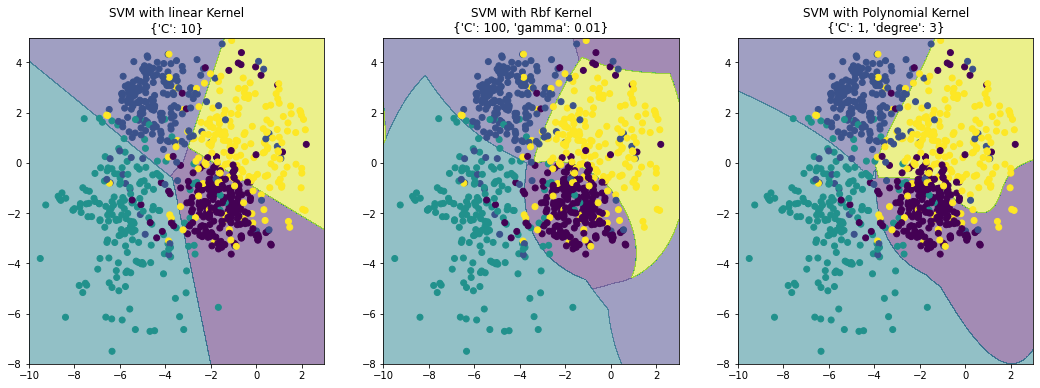

In [ ]:
xx, yy = np.meshgrid(np.arange(-10, 3, 0.01), np.arange(-8, 5, 0.01))
points = np.c_[xx.ravel(), yy.ravel()]
preds_lin = svm_linear.predict(points)
preds_rbf = svm_rbf.predict(points)
preds_poly = svm_poly.predict(points)
Z_lin = np.array(preds_lin).reshape(xx.shape)
Z_rbf = np.array(preds_rbf).reshape(xx.shape)
Z_poly = np.array(preds_poly).reshape(xx.shape)
plt.figure(figsize = (18,6))
plt.subplot(1, 3, 1)
plt.contourf(xx, yy, Z_lin,alpha=0.5)
plt.scatter(x['x'],x['y'],c=y)
plt.title('SVM with linear Kernel\n'+str(svm_linear.best_params_))

plt.subplot(1, 3, 2)
plt.contourf(xx, yy, Z_rbf,alpha=0.5)
plt.scatter(x['x'],x['y'],c=y)
plt.title('SVM with Rbf Kernel\n'+str(svm_rbf.best_params_))

plt.subplot(1, 3, 3)
plt.contourf(xx, yy, Z_poly,alpha=0.5)
plt.scatter(x['x'],x['y'],c=y)
plt.title('SVM with Polynomial Kernel\n'+str(svm_poly.best_params_))
plt.show()